In [ ]:
# Imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
# for easier reading np
np.set_printoptions(precision=3,suppress=True)

In [ ]:
# Configuration options
feature_vector_length = 4
num_classes = 3

In [ ]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')
# Load the data
with open('/content/drive/My Drive/Colab Notebooks/data/iris.csv', 'r') as f: 
  temp = np.genfromtxt(f,delimiter=',')
  X = temp[:,:-1]
  y = temp[:,-1]

Mounted at /content/drive


In [ ]:

# Perform stratified data partition at a 70/30 ratio to yield Xtrain, ytrain (label), Xtest, and ytest.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle = True, stratify = y);
print(X_train.shape)
print(X_test.shape)

(105, 4)
(45, 4)


In [ ]:
# Convert target classes to categorical ones
Y_train = to_categorical(y_train-1)
Y_test = to_categorical(y_test-1)
print(Y_train.shape)
print(Y_test.shape)

(105, 3)
(45, 3)


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 5)                 25        
                                                                 
 dense_30 (Dense)            (None, 3)                 18        
                                                                 
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________
None


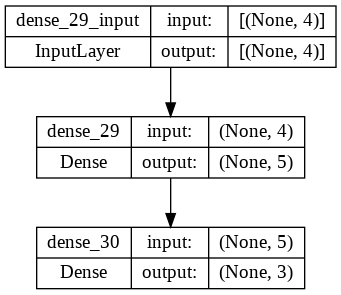

In [ ]:
# Create the model
model = Sequential()
model.add(Dense(5, input_dim = 4, activation='sigmoid'))
# model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='softmax'))
print(model.summary())
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=10, batch_size=45, verbose=1)

Epoch 1/10
3/3 [==============================] - 0s 5ms/step - loss: 1.1716 - accuracy: 0.4000
Epoch 2/10
3/3 [==============================] - 0s 6ms/step - loss: 1.1692 - accuracy: 0.3714
Epoch 3/10
3/3 [==============================] - 0s 6ms/step - loss: 1.1670 - accuracy: 0.3714
Epoch 4/10
3/3 [==============================] - 0s 5ms/step - loss: 1.1650 - accuracy: 0.3714
Epoch 5/10
3/3 [==============================] - 0s 5ms/step - loss: 1.1626 - accuracy: 0.3714
Epoch 6/10
3/3 [==============================] - 0s 6ms/step - loss: 1.1602 - accuracy: 0.3714
Epoch 7/10
3/3 [==============================] - 0s 5ms/step - loss: 1.1579 - accuracy: 0.3714
Epoch 8/10
3/3 [==============================] - 0s 5ms/step - loss: 1.1559 - accuracy: 0.3429
Epoch 9/10
3/3 [==============================] - 0s 5ms/step - loss: 1.1538 - accuracy: 0.3714
Epoch 10/10
3/3 [==============================] - 0s 4ms/step - loss: 1.1515 - accuracy: 0.3619


In [ ]:
# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

2/2 [==============================] - 0s 6ms/step - loss: 1.1478 - accuracy: 0.3556
Test results - Loss: 1.147776484489441 - Accuracy: 0.35555556416511536%
